In [2]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

# trafic sign

In [75]:
df = pd.DataFrame({"domains":   ["INet", "quickdraw","qo","qoi","qoia","qoiaf","qoiafc","qoiafcv",
                                 "INet","quickdraw","qo","qoi","qoia","qoiaf","qoiafc","qoiafcv",
                                 "INet","quickdraw","qo","qoi","qoia","qoiaf","qoiafc","qoiafcv",
                                 ], 
                   "Models":  ["clip","clip","clip","clip","clip","clip","clip","clip",
                                "dinov2","dinov2","dinov2","dinov2","dinov2","dinov2","dinov2","dinov2",
                                "mocov3","mocov3","mocov3","mocov3","mocov3","mocov3","mocov3","mocov3",
                                ],
                  "Accuracy": [34.53,35.13,37.29,38.46,37.74,37.36,37.47,37.82,
                               33.27,35.26,36.88,37.13,35.76,34.80,35.08,34.59,
                               34.32,34.76,34.95,35.25,34.17,34.03,33.82,33.94,
                               ]})
df['Error'] = 0.1

df

,domains,Models,Accuracy,Error
0,INet,clip,34.53,0.1
1,quickdraw,clip,35.13,0.1
2,qo,clip,37.29,0.1
3,qoi,clip,38.46,0.1
4,qoia,clip,37.74,0.1
5,qoiaf,clip,37.36,0.1
6,qoiafc,clip,37.47,0.1
7,qoiafcv,clip,37.82,0.1
8,INet,dinov2,33.27,0.1
9,quickdraw,dinov2,35.26,0.1


In [46]:
df_clip = df[df['Models'] == 'clip']
# sns.barplot(df_clip,x="domains", y="Accuracy",yerr=df_clip['Error'], capsize=20)
# plt.ylim(33, 40)  # Setting y-axis limits

# plt.title('Accuracy by Domain with Error Bars')
# plt.show()

/home/zhuoyan/.conda/envs/fewshot/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_408555/3218923255.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


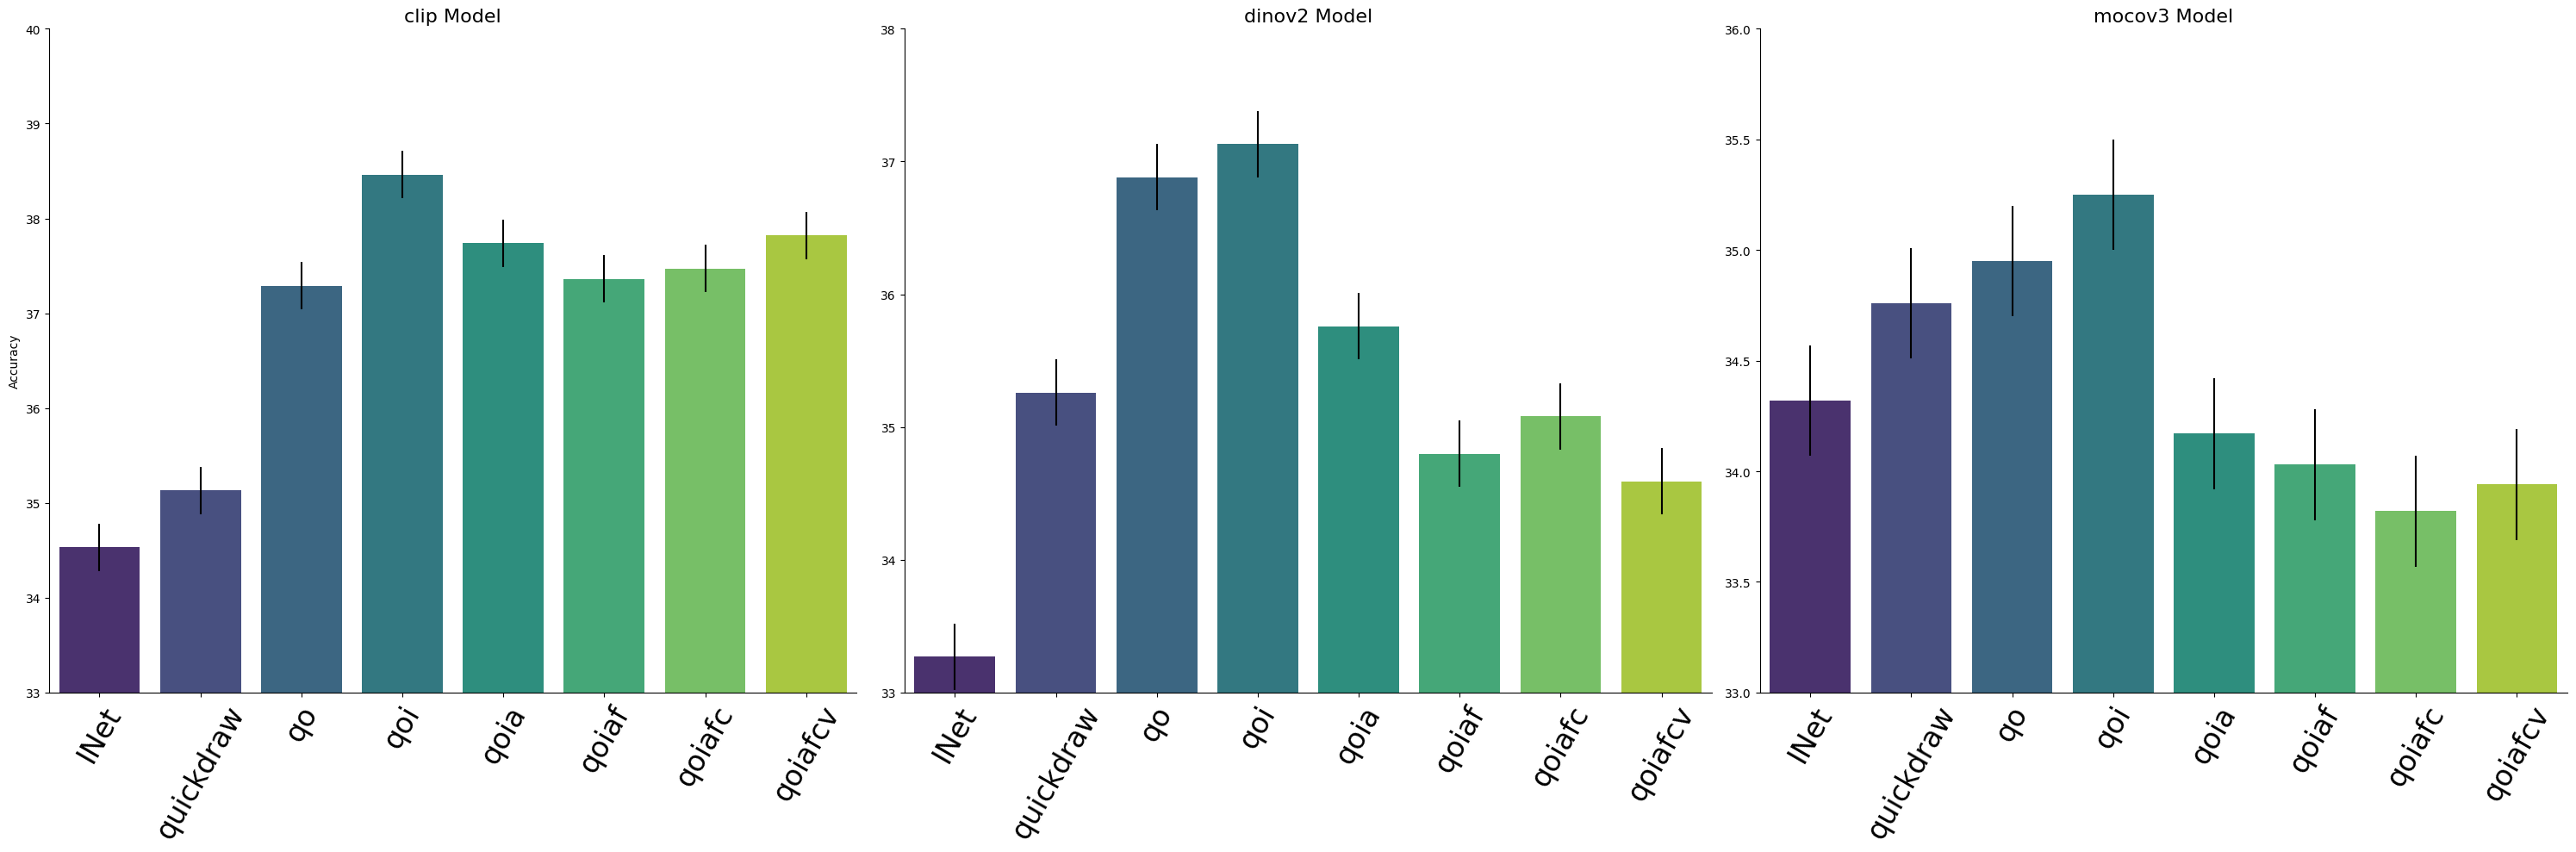

In [59]:
# Create a FacetGrid to have side-by-side plots
g = sns.FacetGrid(df, col="Models", height=10, aspect=1, sharey=False)
g.map_dataframe(sns.barplot, x="domains", y="Accuracy",yerr=df_clip['Error'], palette="viridis", order=["INet", "quickdraw","qo","qoi","qoia","qoiaf","qoiafc","qoiafcv",])

# Adjust titles, axis labels, and set y-limits for better visualization
g.set_titles(col_template="{col_name} Model", size=16)
g.set_axis_labels("", "Accuracy")
g.set_xticklabels(rotation=60, fontsize=24)
# Adjusting y-limits to zoom in on differences for each model.
# These limits are set based on the data you provided. Adjust as necessary for different datasets.
g.axes[0,0].set_ylim(33, 40)
g.axes[0,1].set_ylim(33, 38)
g.axes[0,2].set_ylim(33, 36)

plt.tight_layout()
plt.show()

In [49]:
df

,domains,Models,Accuracy,Error
0,INet,clip,34.53,0.25
1,quickdraw,clip,35.13,0.25
2,qo,clip,37.29,0.25
3,qoi,clip,38.46,0.25
4,qoia,clip,37.74,0.25
5,qoiaf,clip,37.36,0.25
6,qoiafc,clip,37.47,0.25
7,qoiafcv,clip,37.82,0.25
8,INet,dinov2,33.27,0.10
9,quickdraw,dinov2,35.26,0.10


In [54]:
df['Error'].values

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 ])

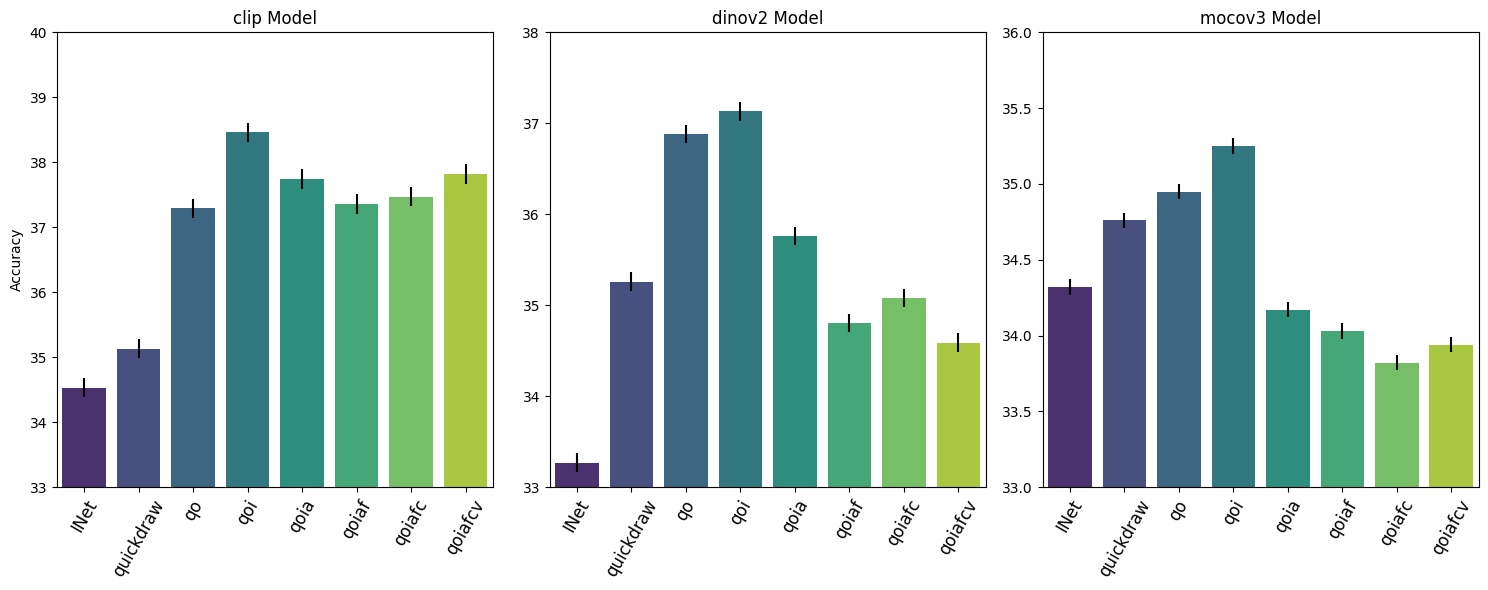

In [80]:
df.loc[df['Models'] == 'clip','Error'] = 0.15
df.loc[df['Models'] == 'dinov2','Error'] = 0.1

df.loc[df['Models'] == 'mocov3','Error'] = 0.05



unique_models = df["Models"].unique()
n_models = len(unique_models)
fig, axes = plt.subplots(1, n_models, figsize=(15, 6), sharey=False)

for i, model in enumerate(unique_models):
    subset = df[df["Models"] == model]
    sns.barplot(subset,x="domains", y="Accuracy", yerr=subset["Error"].values, palette="viridis", ax=axes[i], 
                order=["INet","quickdraw", "qo", "qoi", "qoia", "qoiaf", "qoiafc", "qoiafcv"])
    
    # Adjust the visualization
    axes[i].set_title(f"{model} Model")
    axes[i].set_ylabel("Accuracy" if i == 0 else "")
    axes[i].set_xlabel("")
    # axes[i].set_ylim(33, 40)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=60, fontsize=12)

axes[0].set_ylim(33, 40)
axes[1].set_ylim(33, 38)
axes[2].set_ylim(33, 36)

plt.tight_layout()
plt.show()


# mscoco

In [16]:
# df = pd.DataFrame({
#                   "domains":   ["INet", "quickdraw","qo","qoi","qoif","qoifa","qoifac","qoifacv",
#                                  "INet", "quickdraw","qo","qoi","qoif","qoifa","qoifac","qoifacv",
#                                  "INet", "quickdraw","qo","qoi","qoif","qoifa","qoifac","qoifacv",
#                                  ], 
#                   "Models":  ["clip","clip","clip","clip","clip","clip","clip","clip",
#                                 "dinov2","dinov2","dinov2","dinov2","dinov2","dinov2","dinov2","dinov2",
#                                 "mocov3","mocov3","mocov3","mocov3","mocov3","mocov3","mocov3","mocov3",
#                                 ],
#                         # "INet", "quickdraw","qo","qoi","qoif","qoifa","qoifac","qoifacv",
#                   "Accuracy": [36.74,29.87,30.16,36.03,35.19,34.97,34.00,33.77,
                        
#                                49.61,43.67,42.07,47.92,48.36,47.26,47.34,47.66,
                                                 
#                                33.15,33.42,33.02,34.04,33.75,33.67,33.68,33.74,
                                                 
#                                ]})
# df['Error'] = 0.1

# df

,domains,Models,Accuracy,Error
0,INet,clip,36.74,0.1
1,quickdraw,clip,29.87,0.1
2,qo,clip,30.16,0.1
3,qoi,clip,36.03,0.1
4,qoif,clip,35.19,0.1
5,qoifa,clip,34.97,0.1
6,qoifac,clip,34.00,0.1
7,qoifacv,clip,33.77,0.1
8,INet,dinov2,49.61,0.1
9,quickdraw,dinov2,43.67,0.1


In [ ]:
df = pd.DataFrame({
                  "domains":    ["INet", "iq","iqo","iqof","iqofv","iqofva","iqofvac",
                                 "INet", "iq","iqo","iqof","iqofv","iqofva","iqofvac",
                                 "INet", "iq","iqo","iqof","iqofv","iqofva","iqofvac",
                                 ], 
                  "Models":  ["clip","clip","clip","clip","clip","clip","clip","clip",
                                "dinov2","dinov2","dinov2","dinov2","dinov2","dinov2","dinov2","dinov2",
                                "mocov3","mocov3","mocov3","mocov3","mocov3","mocov3","mocov3","mocov3",
                                ],
                        # "INet", "quickdraw","qo","qoi","qoif","qoifa","qoifac","qoifacv",
                  "Accuracy": [37.21,29.87,30.16,36.03,35.19,34.97,34.00,33.77,
                        
                               49.61,43.67,42.07,47.92,48.36,47.26,47.34,47.66,
                                                 
                               33.15,33.42,33.02,34.04,33.75,33.67,33.68,33.74,
                                                 
                               ]})
df['Error'] = 0.1

df

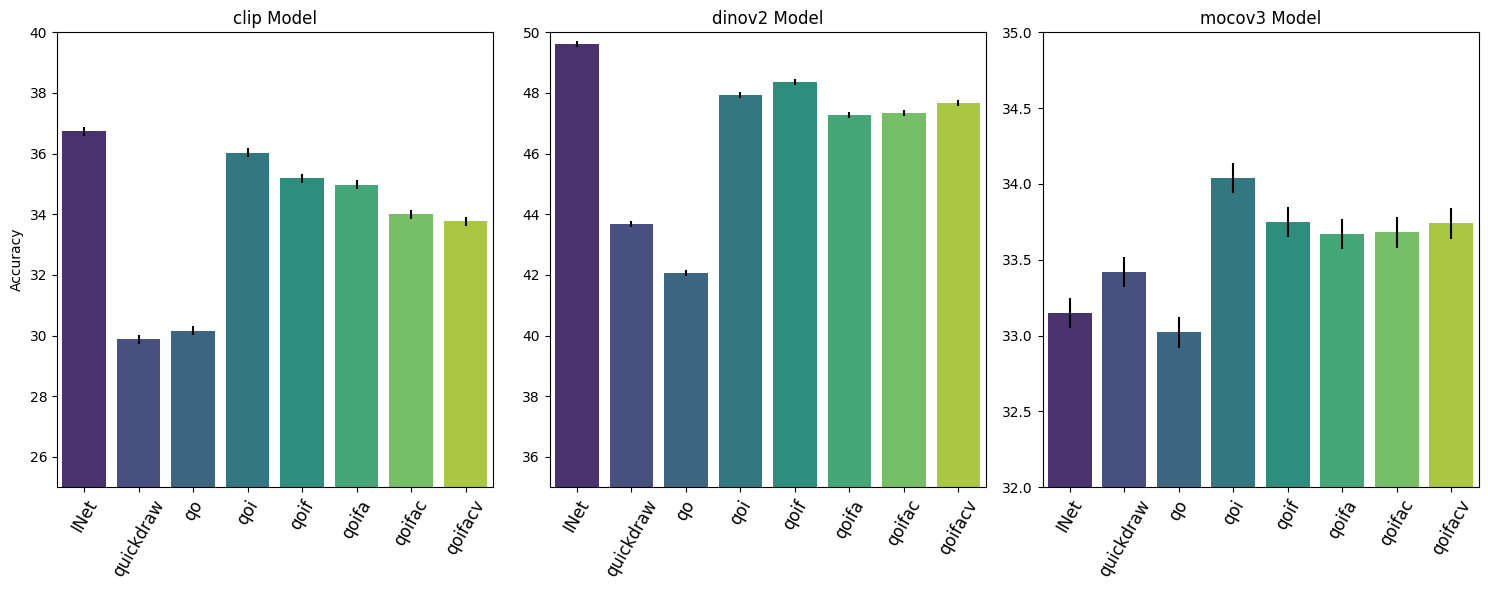

In [18]:
df.loc[df['Models'] == 'clip','Error'] = 0.15
df.loc[df['Models'] == 'dinov2','Error'] = 0.1

df.loc[df['Models'] == 'mocov3','Error'] = 0.1



unique_models = df["Models"].unique()
n_models = len(unique_models)
fig, axes = plt.subplots(1, n_models, figsize=(15, 6), sharey=False)

for i, model in enumerate(unique_models):
    subset = df[df["Models"] == model]
    sns.barplot(subset,x="domains", y="Accuracy", yerr=subset["Error"].values, palette="viridis", ax=axes[i], 
                order=["INet","quickdraw", "qo", "qoi", "qoif", "qoifa", "qoifac", "qoifacv"])
    
    # Adjust the visualization
    axes[i].set_title(f"{model} Model")
    axes[i].set_ylabel("Accuracy" if i == 0 else "")
    axes[i].set_xlabel("")
    # axes[i].set_ylim(33, 40)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=60, fontsize=12)

axes[0].set_ylim(25, 40)
axes[1].set_ylim(35, 50) 
axes[2].set_ylim(32, 35)

plt.tight_layout()
plt.show()
